# Tarea 7

__Alumno:__ Eduardo Carrasco

__Curso:__ Aprendizaje Automático 2022 

__Programa:__ Doctorado en Ingeniería de Sistemas Complejos

__Profesor:__ Gonzalo A. Ruz

__Ayudante:__ Carlos Sepúlveda

**Tema**: Clustering

## Instrucciones
* La actividad es individual
* Por favor responder en este mismo notebook
* Renombrar el archivo agregando su nombre, por ejemplo tarea7_Toledo_Mirosevic.ipynb
* Subir el archivo al link de entrega Trabajo en webcursos que será habilitado
* __Fecha de entrega:__ viernes 02 de diciembre, 23:55 hrs.

El conjunto de datos que utilizará es el conjunto de datos del telescopio MAGIC Gamma. Los datos se generan para simular el registro de partículas gamma de alta energía en un telescopio gamma Cherenkov atmosférico basado en la tierra. Para obtener detalles completos sobre la descripción del conjunto de datos, consulte este [enlace](https://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope).

__Descripcion__:

| **Name**             | **Data Type** | **Measurement**    | **Description** |
|:----------------------:|:---------------:|:--------------------:|-----------------|
|fLength|continuous|[mm]|Major axis of ellipse|
|fWidth|continuous|[mm]|Minor axis of ellipse|
|fSize|continuous|[in #phot]|10-log of sum of content of all pixels|
|fConc|continuous|[ratio]|Ratio of sum of two highest pixels over fSize|
|fConc1|continuous|[ratio]|Ratio of highest pixel over fSize|
|fAsym|continuous|[mm]|Distance from highest pixel to center, projected onto major axis|
|fM3Long|continuous|[mm]|3rd root of third moment along major axis|
|fM3Trans|continuous |[mm]|3rd root of third moment along minor axis|
|fAlpha|continuous|[deg]|Angle of major axis with vector to origin|
|fDist|continuous|[mm]|Distance from origin to center of ellipse|
|class|discrete|[g , h]|gamma (signal), hadron (background)|

In [1]:
### Conocer version de paquetes y Hardware en uso
#------------------------------------------------------
#------------------------------------------------------
import sys
import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf
import platform

print(f"Plataforma (Software-Hardware): {platform.platform()}")
print(f"Versión de Python {sys.version}")
print(f"Versión de TensorFlow: {tf.__version__}")
print(f"Versión de Keras: {tensorflow.keras.__version__}")
print(f"versión de Pandas {pd.__version__}")
print(f"Versión de Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU está", "Disponible" if gpu else "No Disponible")
#---------------------------------------------------------

Plataforma (Software-Hardware): macOS-13.0.1-arm64-i386-64bit
Versión de Python 3.9.13 | packaged by conda-forge | (main, May 27 2022, 17:01:00) 
[Clang 13.0.1 ]
Versión de TensorFlow: 2.10.0
Versión de Keras: 2.10.0
versión de Pandas 1.5.1
Versión de Scikit-Learn 1.1.3
GPU está Disponible


## 1. Exploratory Data Analisis (EDA):

In [2]:
import pandas as pd
telescope_data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data',header=None)
telescope_data.columns = ['fLength', 'fWidth','fSize','fConc','fConcl','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']
telescope_data.head()

,fLength,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [3]:
telescope_data.describe(include='all')

,fLength,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,g
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12332
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026,NaN
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787,NaN
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600,NaN
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250,NaN
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450,NaN
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825,NaN


In [4]:
telescope_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConcl    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


Demos de baja la variable clase

In [5]:
# Se elimina la variable discreta (objetivo)
X=telescope_data.drop(columns ='class',axis=1)

In [6]:
X.head()

,fLength,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620


Del análisis parcial y estadística descriptiva, se puede observar que todas las variables son numéricas y corresponden a atributos continuos.

Se debe efectuar un estandarizado de los valores.

In [7]:
from sklearn.preprocessing import StandardScaler
# Standardize the data so that they have mean 0 and variance 1
X_std = pd.DataFrame(StandardScaler().fit_transform(X),columns=X.columns)

#shows the first 5 rows of the table
X_std.head(8)

,fLength,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,-0.577226,-0.336804,-0.381130,0.062759,-0.148923,0.541042,0.224818,-0.405842,0.476816,-1.497866
1,-0.510969,-0.570027,-0.648595,0.820383,1.471776,0.516919,0.260364,-0.490094,-0.815418,0.153125
2,2.568278,6.205858,2.615783,-1.875883,-1.773241,2.044992,-1.478536,-2.183030,1.889224,0.842635
3,-0.694768,-0.687259,-1.029478,1.282069,1.606608,0.532771,-0.333515,-0.355359,-0.658804,-1.031463
4,0.516622,0.476384,0.711157,-0.347506,-0.284660,-0.020200,0.353086,1.036620,-0.881039,2.176427
5,-0.038386,-0.056186,0.176651,-0.756678,-0.729877,0.932494,0.640077,0.459251,-0.920690,0.592534
6,-0.118105,-0.262977,0.440519,-0.697053,-0.571517,0.217969,0.540212,0.496333,-0.875523,0.338138
7,-0.624601,-0.459046,-0.577497,0.236712,0.024821,0.573700,0.194327,-0.152636,-1.027996,0.579634


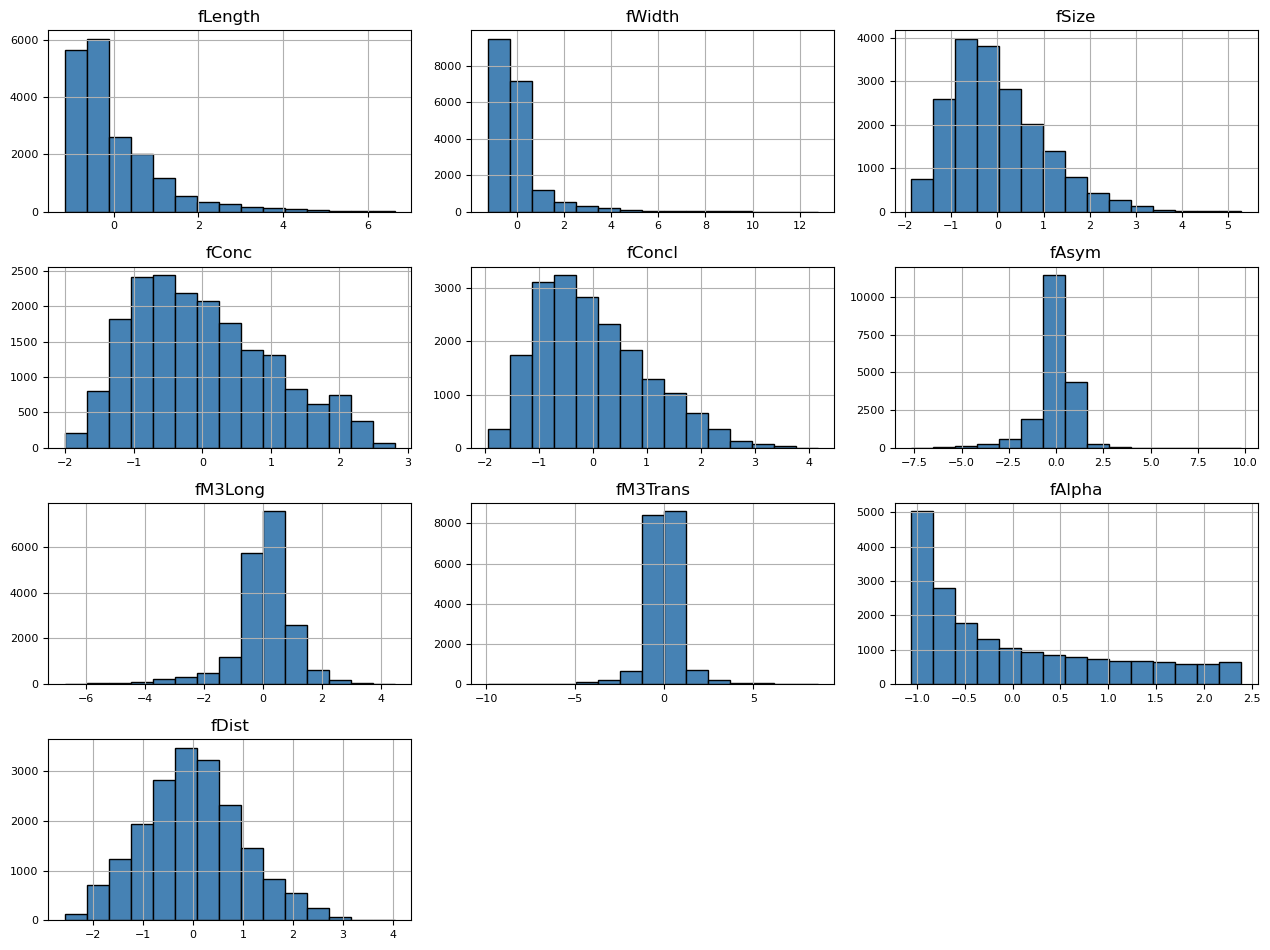

In [8]:
import matplotlib.pyplot as plt

%matplotlib inline

X_std.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=True)
plt.tight_layout(rect=(0, 0, 2, 2)) 

## __Pregunta 1__: 
Aplique k-means, probando desde k = 1 hasta k = 20. Use la Silhouette Score para determinar la cantidad de grupos en los datos. Utilice el valor k* encontrado para ejecutar k*-means y mostrar los grupos resultantes mediante PCA. (__1.5 pts.__)

### A. Aplicación K-MEANS desde k=2 a k=20 - Silhouette Score.


Para n_clusters = 2  - El promedio silhouette_score es : 0.29390070875172525
Para n_clusters = 3  - El promedio silhouette_score es : 0.2698631551826389
Para n_clusters = 4  - El promedio silhouette_score es : 0.20307696862413982
Para n_clusters = 5  - El promedio silhouette_score es : 0.20757534376431092
Para n_clusters = 6  - El promedio silhouette_score es : 0.2019589963220549
Para n_clusters = 7  - El promedio silhouette_score es : 0.2032025660363876
Para n_clusters = 8  - El promedio silhouette_score es : 0.16729657700220307
Para n_clusters = 9  - El promedio silhouette_score es : 0.17158239088958907
Para n_clusters = 10  - El promedio silhouette_score es : 0.16866588474672922
Para n_clusters = 11  - El promedio silhouette_score es : 0.17392651135475232
Para n_clusters = 12  - El promedio silhouette_score es : 0.17294998437549394
Para n_clusters = 13  - El promedio silhouette_score es : 0.16367047133796853
Para n_clusters = 14  - El promedio silhouette_score es : 0.154100648672414

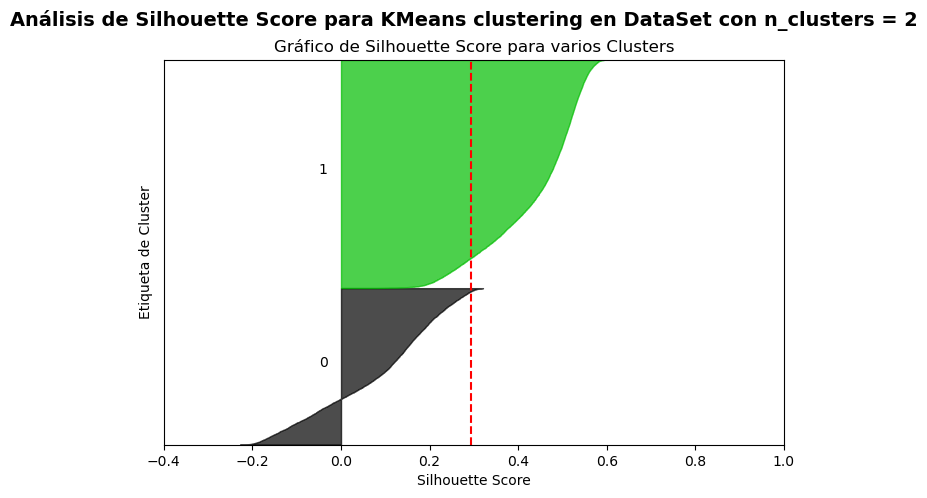

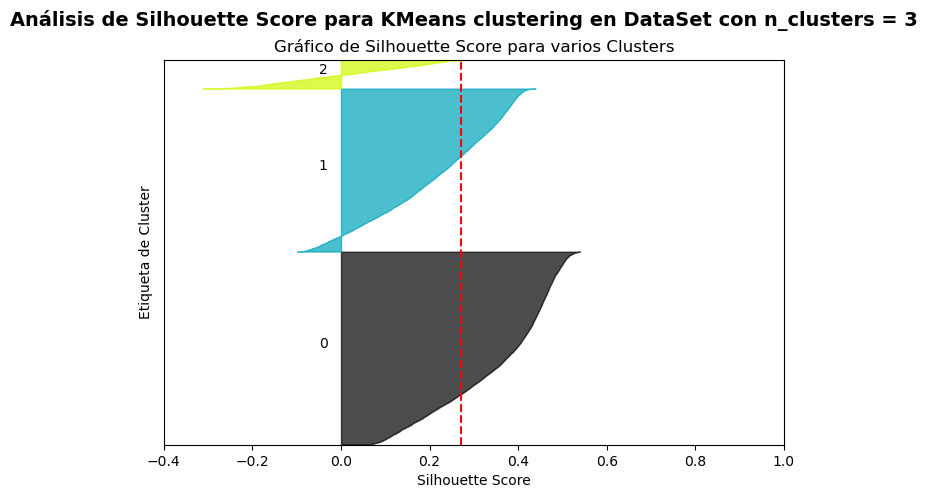

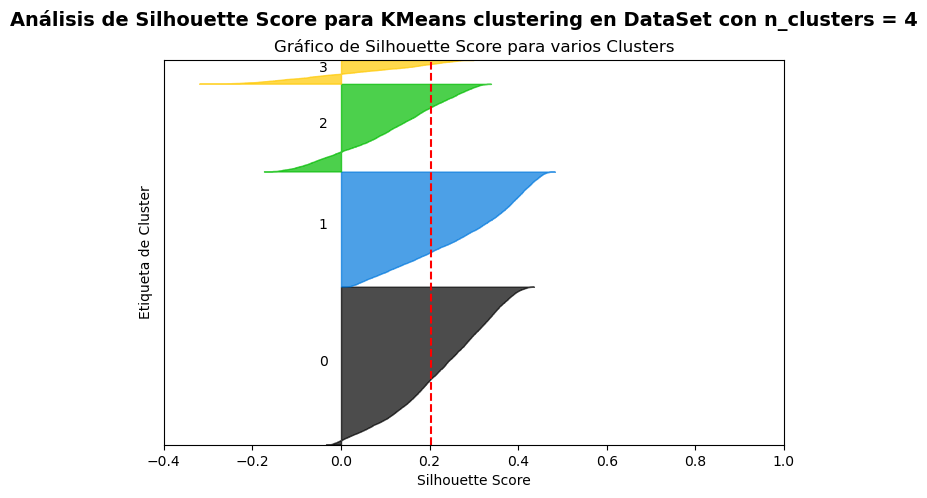

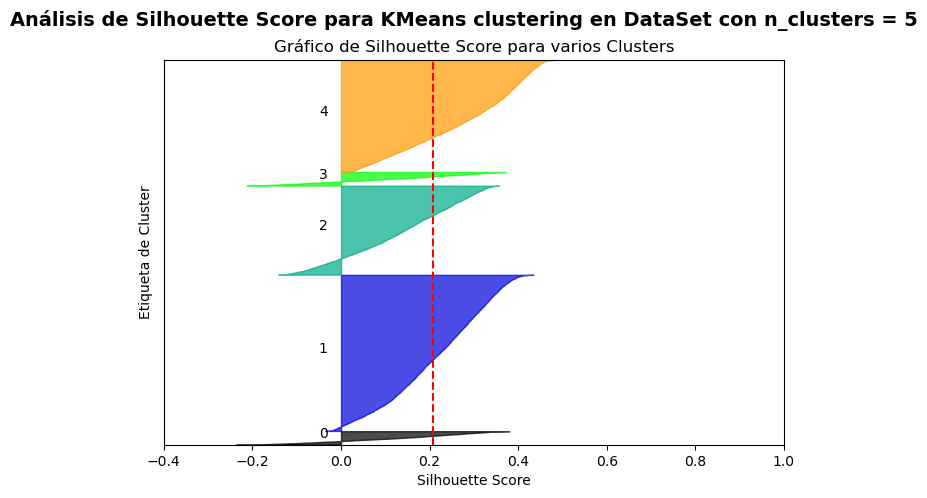

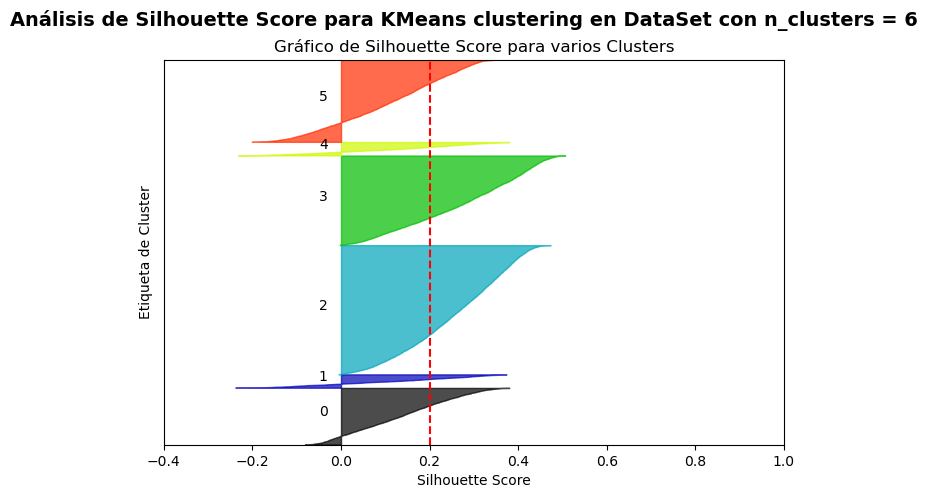

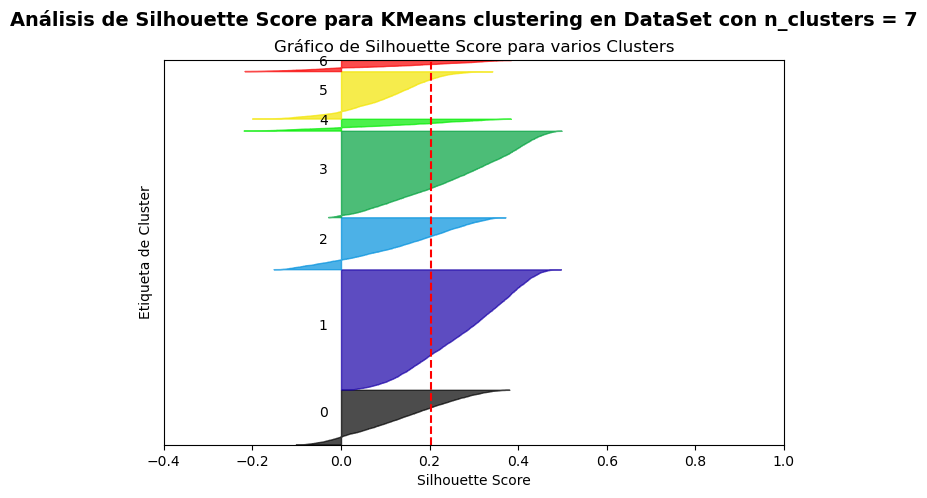

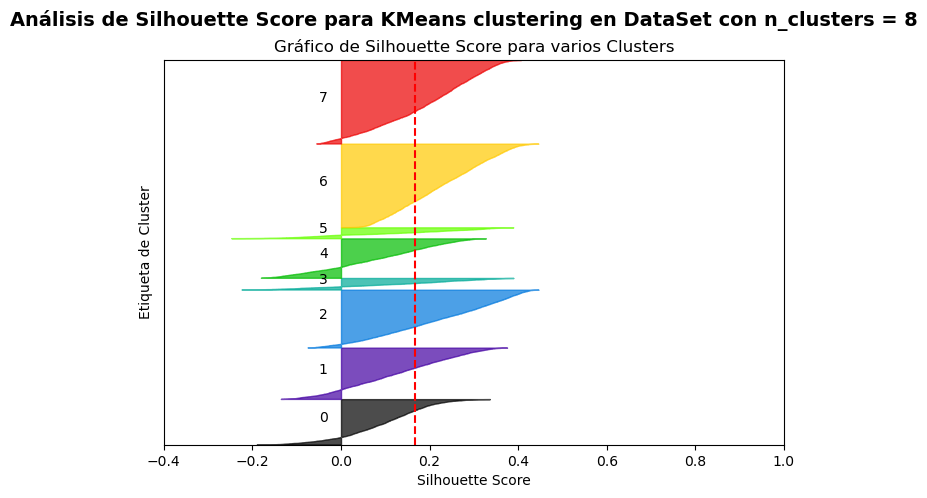

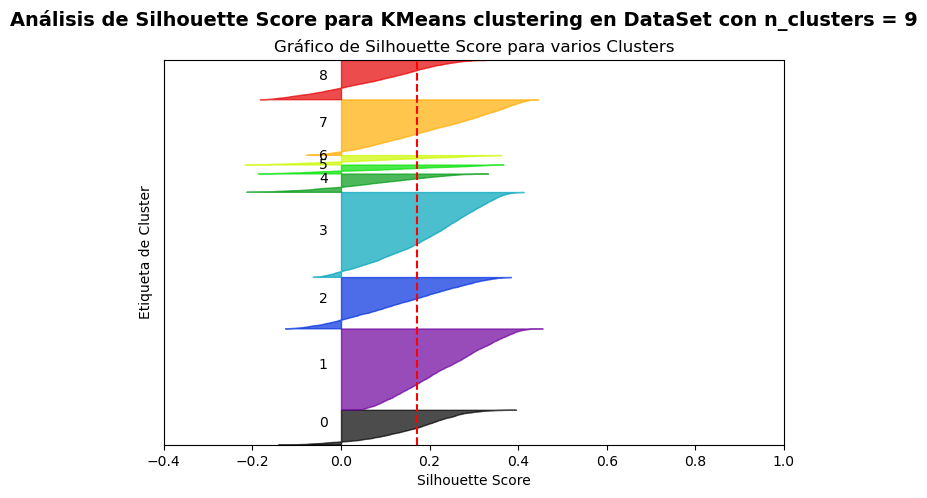

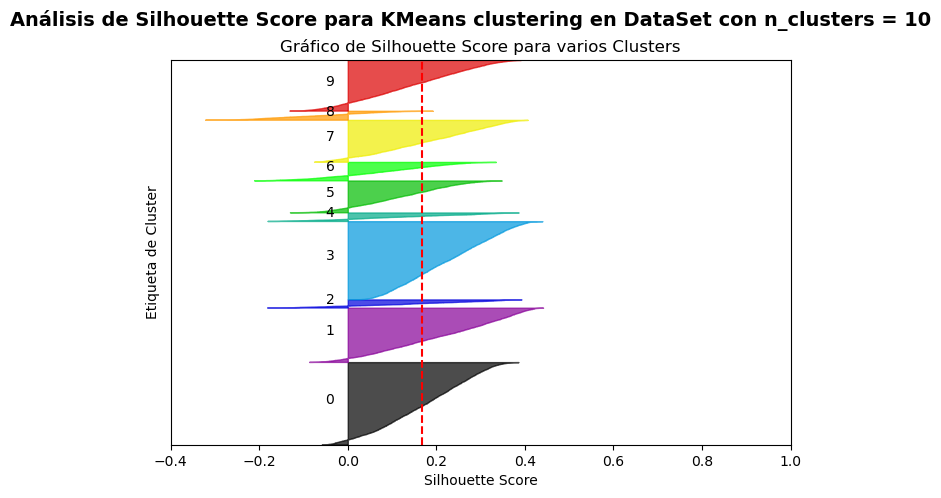

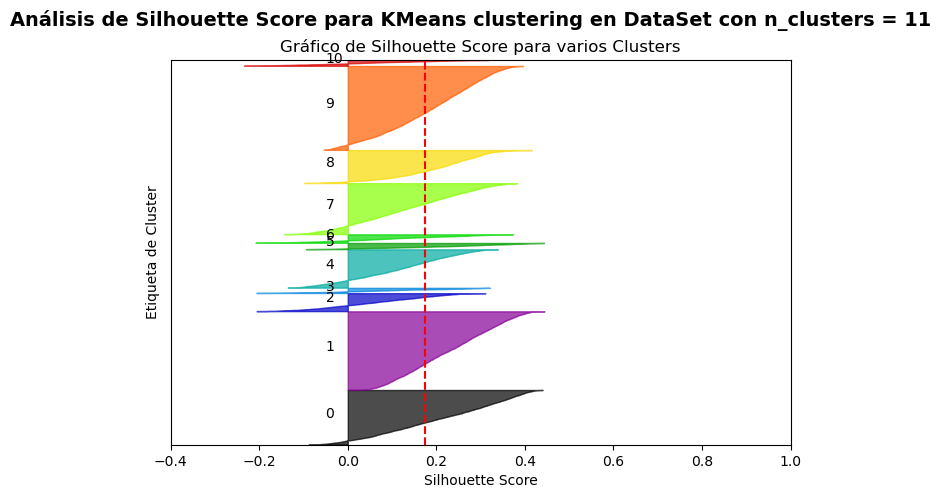

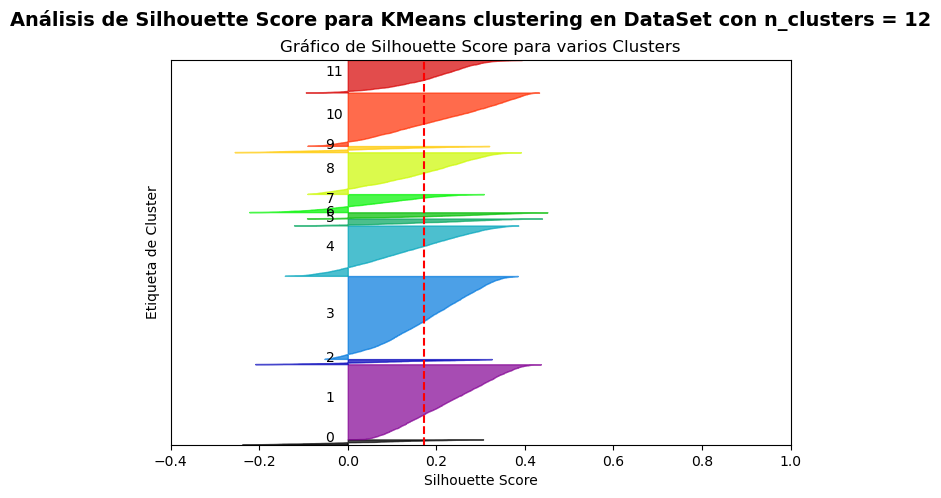

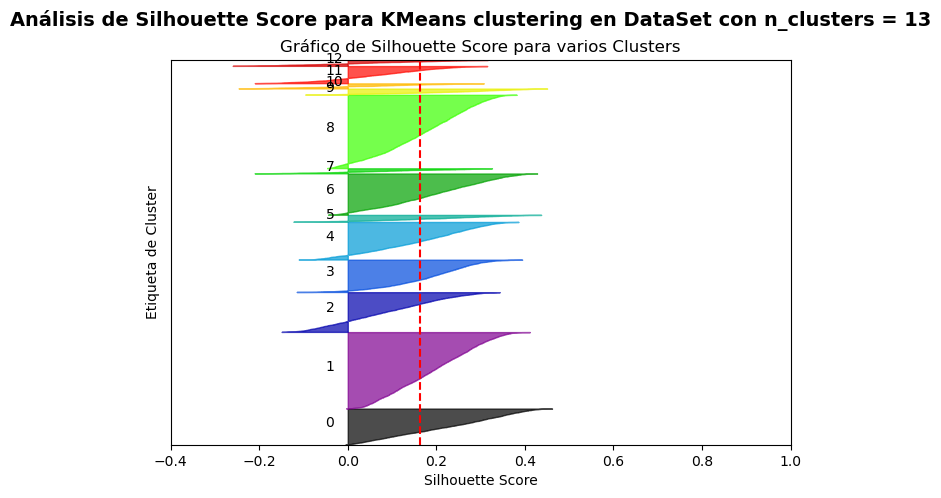

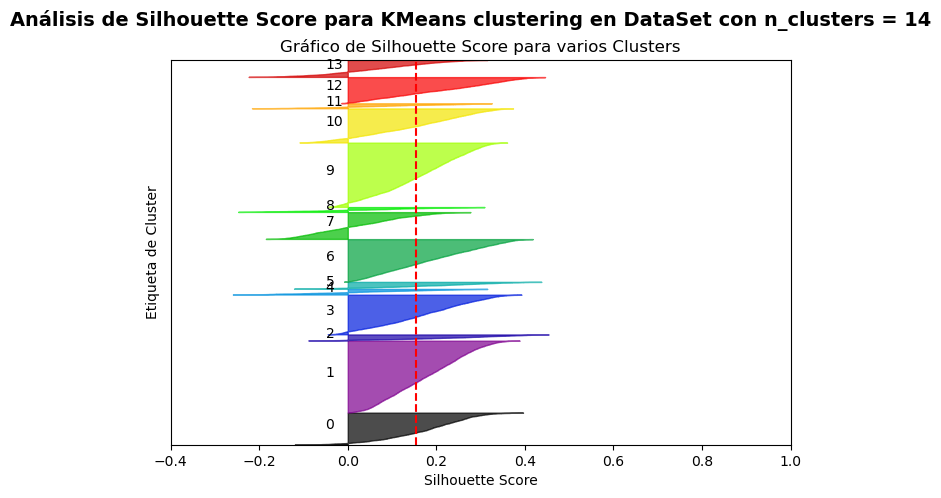

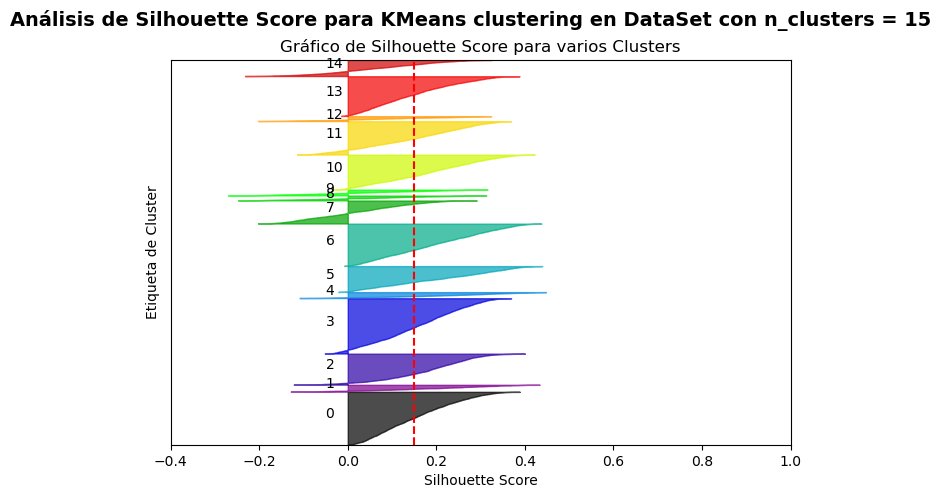

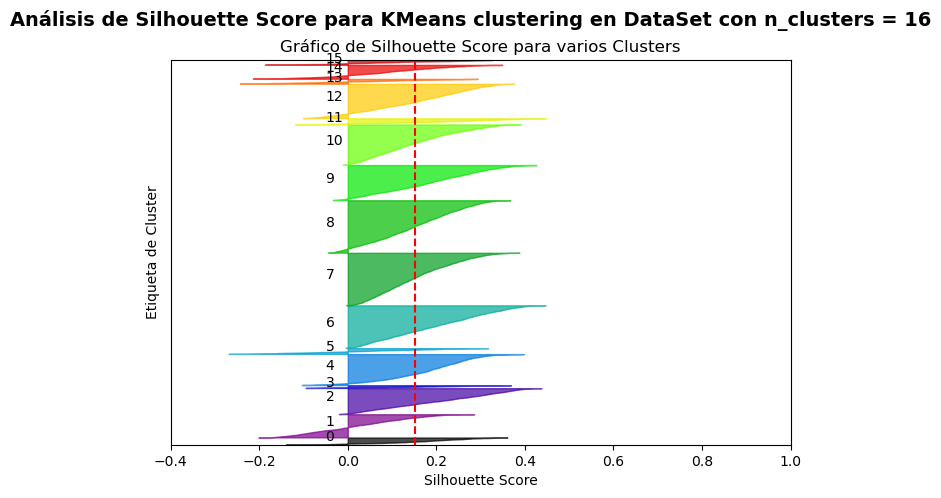

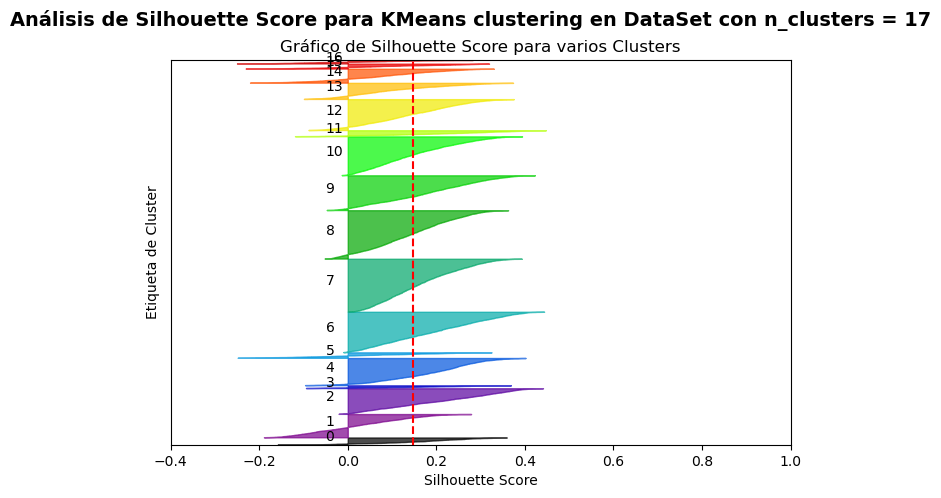

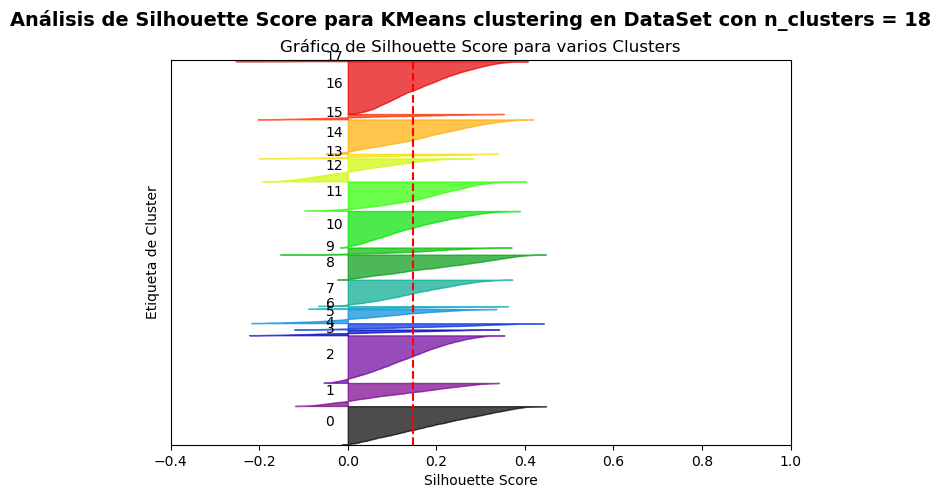

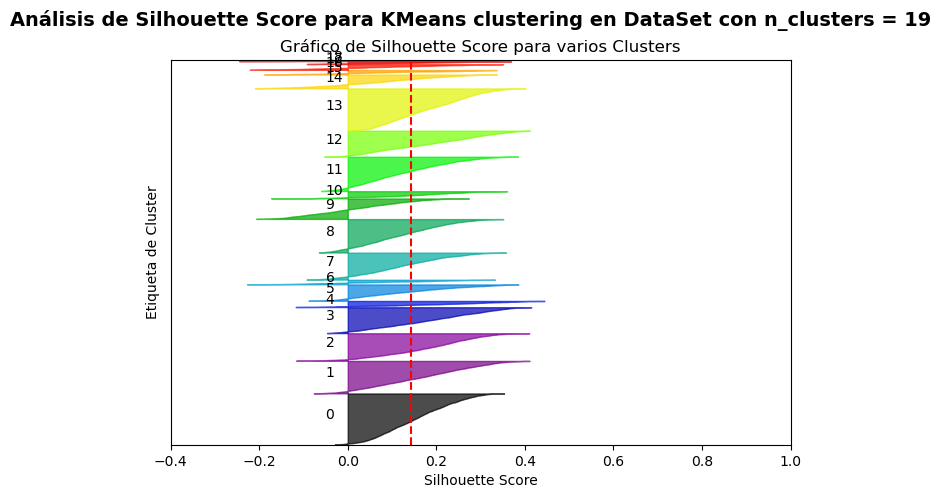

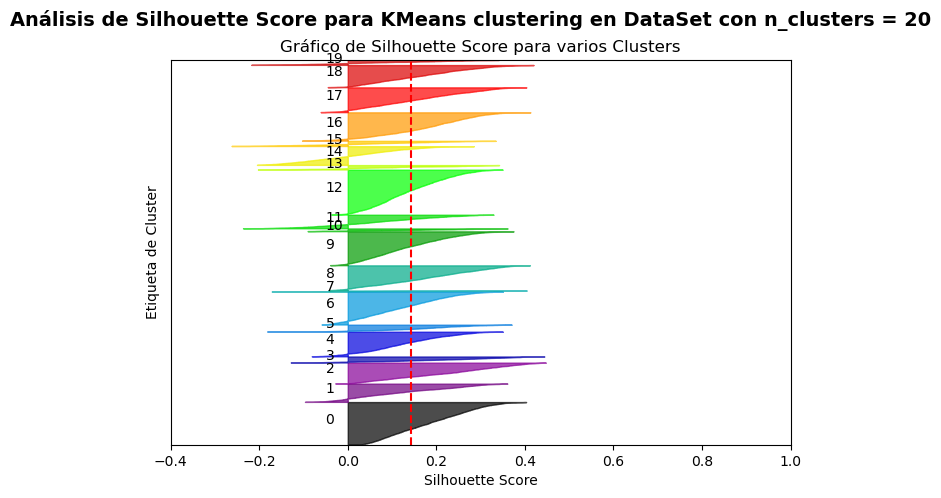

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                    13, 14, 15, 16, 17, 18, 19, 20]

for n_clusters in range_n_clusters:
    fig, ax = plt.subplots(figsize=(8, 5))

    # El silhouette coefficient tiene un rango desde [-1, 1]
    ax.set_xlim([-0.4, 1]) # inicialmente se simuló a -1, 1 pero los valores
    # obtenidos, son por sobre -0.4

    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters
    clusterer = KMeans(n_clusters=n_clusters, random_state=218)
    cluster_labels = clusterer.fit_predict(X_std)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_std, cluster_labels)
    print(
        "Para n_clusters =",
        n_clusters,
        " - El promedio silhouette_score es :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_std, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("Gráfico de Silhouette Score para varios Clusters")
    ax.set_xlabel("Silhouette Score")
    ax.set_ylabel("Etiqueta de Cluster")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(
        "Análisis de Silhouette Score para KMeans clustering en DataSet con n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

### B. K-Means con valor de k encontrado ( _k=2_ ).

In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kfit = kmeans.fit(X_std)
#the centroids
print(kfit.cluster_centers_,'\n')
#the labels
identified_clusters = kfit.predict(X_std)
print(identified_clusters)

[[ 0.80721749  0.6830573   0.92774309 -0.8911593  -0.85494847 -0.21978567
   0.16465017  0.01941941 -0.30434276  0.60663708]
 [-0.5595836  -0.47351262 -0.643135    0.61777419  0.59267193  0.15236099
  -0.11413967 -0.01346203  0.21097811 -0.42053618]] 

[1 1 0 ... 0 0 0]


### C. Visualización usando Principal Component Analysis (PCA).

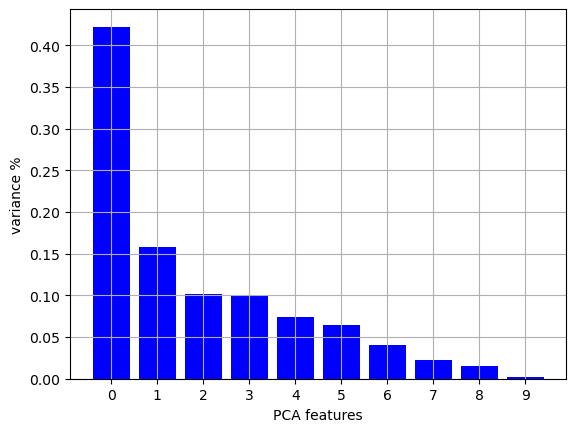

In [11]:
from sklearn.decomposition import PCA

# Create a PCA instance: pca
pca = PCA()
principalComponents = pca.fit_transform(X_std)

# Plot the percentage of the variance that is explained by each component
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='blue')
plt.grid()
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

# Save the components in a dataframe
PCA_components = pd.DataFrame(principalComponents)

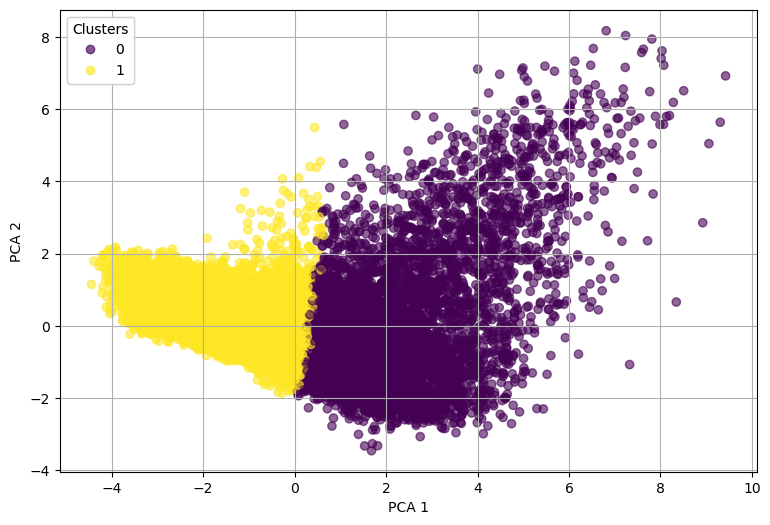

In [12]:
fig, ax = plt.subplots(figsize=(9, 6))
scatter = ax.scatter(PCA_components[0], PCA_components[1], alpha=.6, 
            c=identified_clusters, cmap='viridis')

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="Clusters")
ax.add_artist(legend1)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid()
plt.show()

Utilizamos labels de los cluster identificados, para caracterizar cada variable. Se esperaría encontrar 2 clases.

In [13]:
data_clustered= X.copy()
data_clustered['Cluster_Id'] = identified_clusters
data_clustered.head(10)

,fLength,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist,Cluster_Id
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,0
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,0
5,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,0
6,48.2468,17.3565,3.0332,0.2529,0.1515,8.5730,38.0957,10.5868,4.7920,219.0870,0
7,26.7897,13.7595,2.5521,0.4236,0.2174,29.6339,20.4560,-2.9292,0.8120,237.1340,1
8,96.2327,46.5165,4.1540,0.0779,0.0390,110.3550,85.0486,43.1844,4.8540,248.2260,0
9,46.7619,15.1993,2.5786,0.3377,0.1913,24.7548,43.8771,-6.6812,7.8750,102.2510,1


## __Pregunta 2__: 
Considere mean-shift clustering con el valor predeterminado del ancho de banda, almacene las etiquetas de clustering resultantes. Luego explore diferentes valores de ancho de banda, al menos cuatro (recuerde almacenar las etiquetas de cluster resultantes para cada caso). Utilice Davies-Bouldin Score para concluir qué ancho de banda obtuvo el mejor resultado de clustering. (__1.5 pts.__)

### A. Uso de Mean Shift.
Para el uso de este método de clustering, se considerarán los valores por default de **Bandwidth**.

In [120]:
from sklearn.cluster import MeanShift

ms = MeanShift()
ms.fit(X_std)
cluster_centers = ms.cluster_centers_
print(cluster_centers)

[[-4.11802366e-01 -3.48521495e-01 -3.41699104e-01  1.89175040e-01
   1.60141829e-01  1.67071237e-01 -1.05624973e-03 -7.41343838e-03
  -6.26170555e-02 -2.37496530e-01]
 [ 4.10326180e+00  2.35208551e+00  8.68641567e-01 -8.56988091e-01
  -7.23655405e-01  6.46566387e+00 -4.18931774e+00  2.12858814e+00
   1.12819427e+00 -2.89760343e-01]
 [ 3.64903500e+00  5.59632169e+00  1.62899412e+00 -1.39927149e+00
  -1.40145120e+00 -1.34926093e+00  2.19969359e+00  5.10624806e+00
   1.19850977e+00 -1.57411598e-01]
 [ 2.48270438e+00  5.34806563e+00  3.84023081e+00 -1.86291085e+00
  -1.79327841e+00  1.34090281e+00 -1.05267514e+00  4.12390065e+00
   6.85071603e-01 -1.61858283e-01]
 [ 4.90056843e+00  5.33715019e+00  1.48667693e+00 -1.34882834e+00
  -1.26060800e+00  6.26068729e+00 -2.77582396e+00  4.76483210e+00
   1.43790003e+00 -7.81343930e-01]
 [ 1.78886481e+00  3.48305012e+00  1.11040697e+00 -1.19287266e+00
  -1.23825665e+00  3.02849189e+00 -2.27106199e+00 -3.55118027e+00
   3.56440131e-01 -8.74878119e-01

In [121]:
#cluster labels
ms_bw_df = ms.labels_
print(ms_bw_df)

[ 0  0 30 ...  0  5 14]


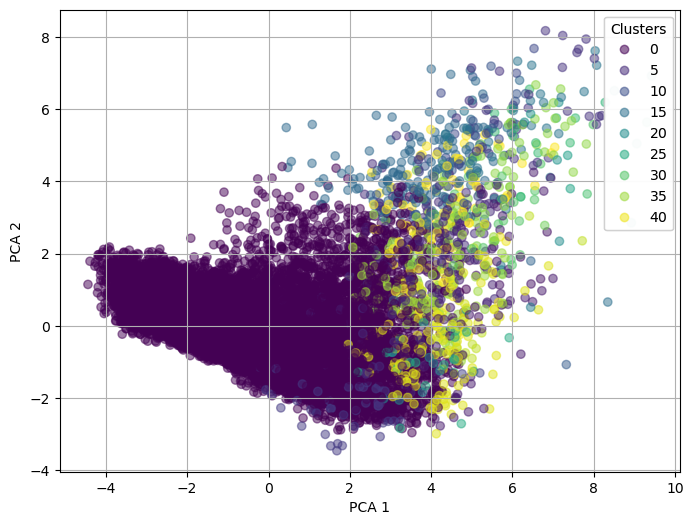

In [122]:
#PCA visualization

fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(PCA_components[0], PCA_components[1], alpha=.5, 
            c=ms.labels_, cmap='viridis')

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")
ax.add_artist(legend1)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid()
plt.show()

### B. Determinación del Bandwith (4 diferentes):

#### B.1. Ancho de Banda (Bandwidth) = 6

In [112]:
from sklearn.cluster import MeanShift
from sklearn.metrics import davies_bouldin_score

ms = MeanShift(bandwidth=6)
ms.fit(X_std)
cluster_centers = ms.cluster_centers_
print(cluster_centers)

# Almacenamos las etiquetas
ms_bw_6 = ms.labels_
print(ms_bw_6)

[[-1.42429249e-01 -1.58194466e-01 -8.84470362e-02  6.19760548e-02
   5.86717775e-02  6.96731016e-02  6.76977772e-02 -1.81546873e-03
  -4.26472420e-02 -3.68164170e-02]
 [ 5.08509376e+00  1.17885237e+01  1.71224423e+00 -1.72599931e+00
  -1.55560955e+00  4.88355223e+00  1.68793077e+00 -4.46092382e+00
   1.25523946e-01 -1.29205080e+00]
 [ 4.42604550e+00  1.12211007e+01  4.40127733e+00 -1.91472155e+00
  -1.82934565e+00  3.42387025e+00 -2.21680501e+00 -9.89799302e+00
   1.91627856e+00 -4.16651953e-01]]
[0 0 1 ... 0 0 0]


In [113]:
db_s_6 = davies_bouldin_score(X_std, ms_bw_6)
print(f'Davies-Bouldin Score(using mean shift) - Bandwidth = 6 : {db_s_6}')

Davies-Bouldin Score(using mean shift) - Bandwidth = 6 : 1.1298803050972668


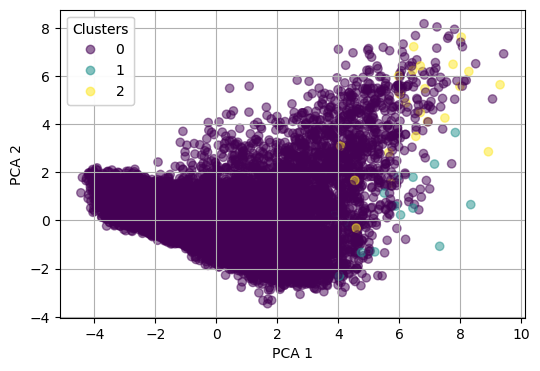

In [114]:
#PCA visualization

fig, ax = plt.subplots(figsize=(6, 4))
scatter = ax.scatter(PCA_components[0], PCA_components[1], alpha=.5, 
            c=ms_bw_6, cmap='viridis')

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="best", title="Clusters")
ax.add_artist(legend1)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid()
plt.show()

#### B.2. Ancho de Banda (Bandwidth) = 5.5

In [115]:
from sklearn.cluster import MeanShift

ms = MeanShift(bandwidth = 5.5)
ms.fit(X_std)
cluster_centers = ms.cluster_centers_
print(cluster_centers)

# Almacenamos las etiquetas
ms_bw_55 = ms.labels_
print(ms_bw_55)

[[-1.73165600e-01 -1.88132871e-01 -1.10303084e-01  7.88624048e-02
   7.44435390e-02  8.42046456e-02  7.32644678e-02 -6.15642441e-03
  -4.76744044e-02 -4.87588579e-02]
 [ 5.08509376e+00  1.17885237e+01  1.71224423e+00 -1.72599931e+00
  -1.55560955e+00  4.88355223e+00  1.68793077e+00 -4.46092382e+00
   1.25523946e-01 -1.29205080e+00]
 [ 4.42604550e+00  1.12211007e+01  4.40127733e+00 -1.91472155e+00
  -1.82934565e+00  3.42387025e+00 -2.21680501e+00 -9.89799302e+00
   1.91627856e+00 -4.16651953e-01]]
[0 0 1 ... 0 0 0]


In [116]:
db_s_55 = davies_bouldin_score(X_std, ms_bw_55)
print(f'Davies-Bouldin Score(using mean shift) - Bandwidth = 5.5 : {db_s_55}')

Davies-Bouldin Score(using mean shift) - Bandwidth = 5.5 : 1.1298803050972668


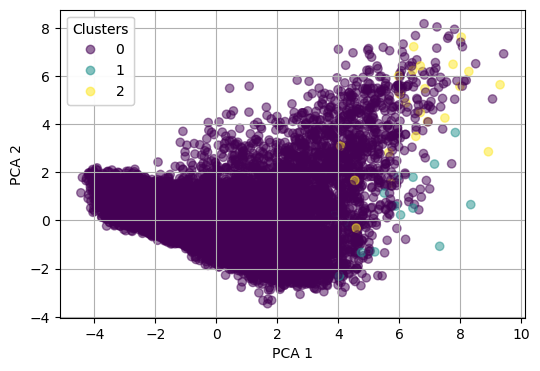

In [117]:
#PCA visualization

fig, ax = plt.subplots(figsize=(6, 4))
scatter = ax.scatter(PCA_components[0], PCA_components[1], alpha=.5, 
            c=ms_bw_55, cmap='viridis')

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="best", title="Clusters")
ax.add_artist(legend1)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid()
plt.show()

#### B.3. Ancho de Banda (Bandwidth) = 5

In [93]:
from sklearn.cluster import MeanShift

ms = MeanShift(bandwidth=5)
ms.fit(X_std)
cluster_centers = ms.cluster_centers_
print(cluster_centers)
ms_bw_5 = ms.labels_
print(ms_bw_5)

[[-2.00115810e-01 -2.12541984e-01 -1.33959044e-01  9.46933123e-02
   8.88226226e-02  9.70374500e-02  7.69089891e-02 -5.73245974e-03
  -4.88606350e-02 -6.49551965e-02]
 [ 4.83410200e+00  8.93399867e+00  1.62125555e+00 -1.56517514e+00
  -1.45810520e+00  5.30678649e+00  1.72983079e+00 -4.66382375e+00
   9.72957409e-01 -8.94178513e-01]
 [ 4.42604550e+00  1.12211007e+01  4.40127733e+00 -1.91472155e+00
  -1.82934565e+00  3.42387025e+00 -2.21680501e+00 -9.89799302e+00
   1.91627856e+00 -4.16651953e-01]]
[0 0 1 ... 0 0 0]


In [94]:
db_s_5 = davies_bouldin_score(X_std, ms_bw_5)
print(f'Davies-Bouldin Score(using mean shift) - Bandwidth = 5 : {db_s_5}')

Davies-Bouldin Score(using mean shift) - Bandwidth = 5 : 1.241840588470654


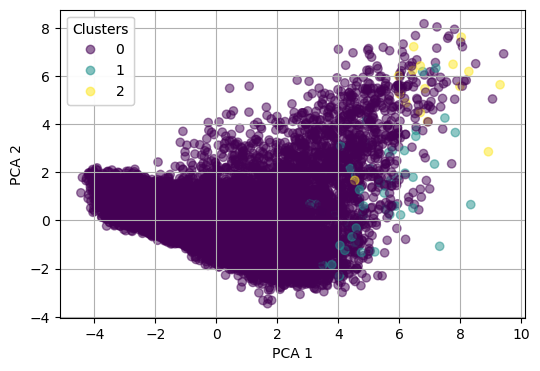

In [95]:
#PCA visualization

fig, ax = plt.subplots(figsize=(6, 4))
scatter = ax.scatter(PCA_components[0], PCA_components[1], alpha=.5, 
            c=ms_bw_5, cmap='viridis')

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="best", title="Clusters")
ax.add_artist(legend1)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid()
plt.show()

#### B.4. Ancho de Banda (Bandwidth) = 4.5

In [96]:
from sklearn.cluster import MeanShift

ms = MeanShift(bandwidth=4.5)
ms.fit(X_std)
cluster_centers = ms.cluster_centers_
print(cluster_centers)
ms_bw_45 = ms.labels_
print(ms_bw_45)

[[-2.41014321e-01 -2.46914445e-01 -1.74591512e-01  1.21061667e-01
   1.11933728e-01  1.12989852e-01  7.01052975e-02 -5.97642821e-03
  -4.92576505e-02 -9.21346679e-02]
 [ 4.91404064e+00  6.28450903e+00  1.59082019e+00 -1.40526267e+00
  -1.28647342e+00  6.13252010e+00 -2.28335154e+00  4.86130273e+00
   1.49181511e+00 -4.87988712e-01]
 [ 5.08509376e+00  1.17885237e+01  1.71224423e+00 -1.72599931e+00
  -1.55560955e+00  4.88355223e+00  1.68793077e+00 -4.46092382e+00
   1.25523946e-01 -1.29205080e+00]
 [ 4.42604550e+00  1.12211007e+01  4.40127733e+00 -1.91472155e+00
  -1.82934565e+00  3.42387025e+00 -2.21680501e+00 -9.89799302e+00
   1.91627856e+00 -4.16651953e-01]
 [ 4.00480083e+00  4.83459573e+00  2.30663312e+00 -1.87643009e+00
  -1.68003505e+00  9.78933005e+00 -5.38775162e+00 -4.70643093e+00
   3.85293592e-01 -1.38315124e-02]
 [ 3.97836785e+00  9.17726716e+00  5.28640681e+00 -1.90159305e+00
  -1.93974500e+00 -4.49199689e+00 -1.15501092e+00 -5.81767214e+00
   2.19706308e+00 -1.35297560e+00

In [97]:
db_s_45 = davies_bouldin_score(X_std, ms_bw_45)
print(f'Davies-Bouldin Score(using mean shift) - Bandwidth = 4.5 : {db_s_45}')

Davies-Bouldin Score(using mean shift) - Bandwidth = 4.5 : 1.1230325819003544


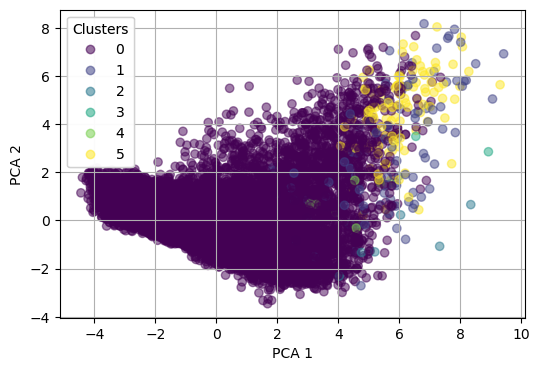

In [98]:
#PCA visualization

fig, ax = plt.subplots(figsize=(6, 4))
scatter = ax.scatter(PCA_components[0], PCA_components[1], alpha=.5, 
            c=ms_bw_45, cmap='viridis')

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="best", title="Clusters")
ax.add_artist(legend1)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid()
plt.show()

### C. Davies-Bouldin Score, para elección Ancho de Banda:

In [101]:
print(f'Davies-Bouldin Score(using mean shift) - Bandwidth = 6 : {db_s_6}')
print(f'Davies-Bouldin Score(using mean shift) - Bandwidth = 5.5 : {db_s_55}')
print(f'Davies-Bouldin Score(using mean shift) - Bandwidth = 5 : {db_s_5}')
print(f'Davies-Bouldin Score(using mean shift) - Bandwidth = 4.5 : {db_s_45}')

Davies-Bouldin Score(using mean shift) - Bandwidth = 6 : 1.1298803050972668
Davies-Bouldin Score(using mean shift) - Bandwidth = 5.5 : 1.1298803050972668
Davies-Bouldin Score(using mean shift) - Bandwidth = 5 : 1.241840588470654
Davies-Bouldin Score(using mean shift) - Bandwidth = 4.5 : 1.1230325819003544


## __Pregunta 3__: 
Usa cualquiera de los algoritmos de clustering que vimos en clases. Genere dos clusters a partir del conjunto de datos (sin la variable de clase). Calcule el Adjusted Rand index utilizando las etiquetas del cluster resultantes y la variable de clase del conjunto de datos original. Según el valor del índice, ¿hay alguna correspondencia entre el resultado del clustering y la variable de clase? Comenta tu respuesta. (__1.5 pts.__)

### A. Selección de DBSCAN:

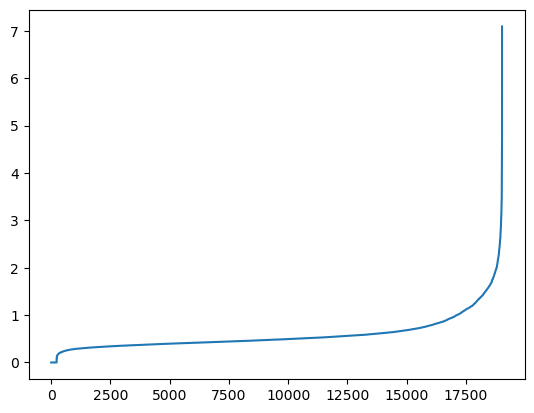

In [109]:
import numpy as np

from sklearn.neighbors import NearestNeighbors

#We will consider MinPts = 2
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(X_std)
distances, indices = nbrs.kneighbors(X_std)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

We notice that for MinPts=2, Eps is between 0.8-1.0. We will consider Eps=0.9. 

In [110]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.9, min_samples=3)
db.fit(X_std)
print(db.labels_)
# los que presente -1, son los noise points

[ 0  0 -1 ... -1 -1 -1]


label -1 corresponds to noisy points.

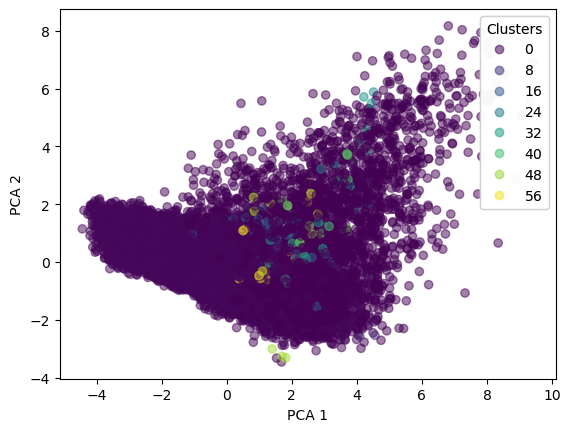

In [111]:
#PCA visualization

fig, ax = plt.subplots()
scatter = ax.scatter(PCA_components[0], PCA_components[1], alpha=.5, 
            c=db.labels_)

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")
ax.add_artist(legend1)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

#los -1 corresponden a noise points

## __Pregunta 4__: 
Basado en el valor k* encontrado en la pregunta 1, caracterice cada grupo considerando algunos de los atributos (al menos tres que encuentre sean relevantes para esta aplicación). (__1.5 pts.__)

### Respuesta:

## Buena suerte!

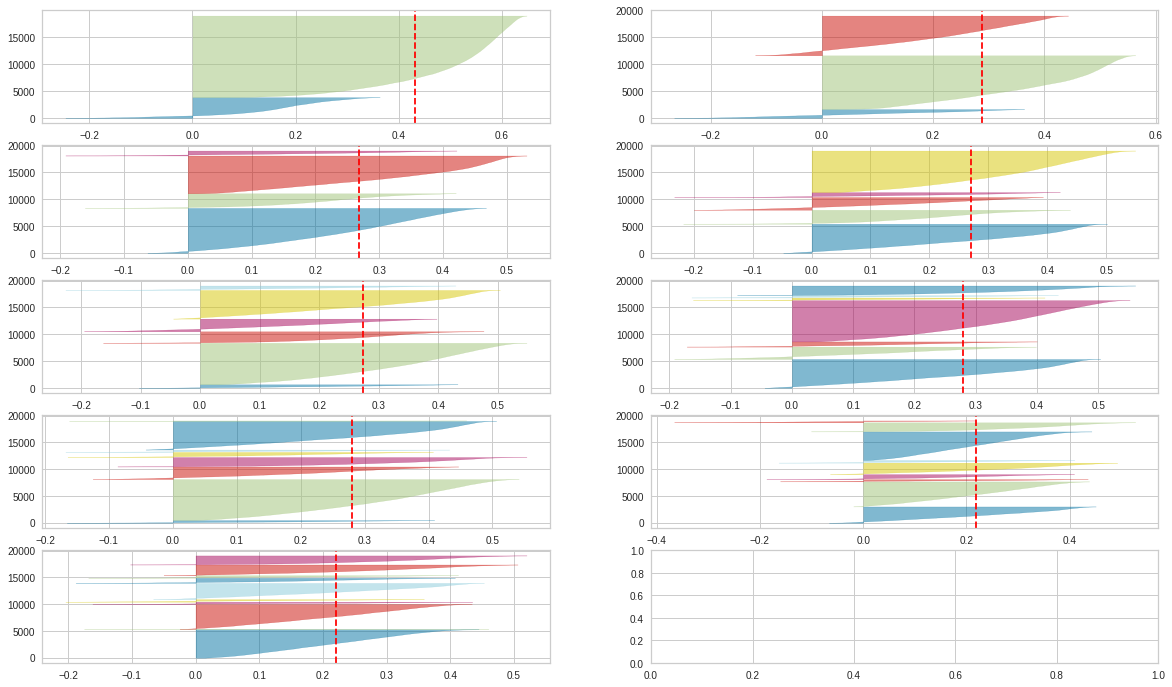

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(5, 2, figsize=(20,12))
for i in [2, 3, 4, 5, 6, 7, 8, 9, 10]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=218)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)